## **CompBio Playbook**

<a target="_blank" href="https://colab.research.google.com/github/ccdsiub/compbio_bracu/blob/main/day_02.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


### **1. Setup ProFAB and import libraries**

This code snippet sets up a Python environment by cloning the `ProFAB` repository and importing necessary modules for data preprocessing, model learning, and evaluation. It also imports visualization libraries such as `seaborn` and `matplotlib`, and configures `pandas` to display all columns in dataframes.

In [46]:
%%capture
import os
if not os.path.exists('profab'):
    !git clone https://github.com/kansil/ProFAB.git
    !cp -r ProFAB/profab .
    !rm -rf ProFAB

from profab.import_dataset import GOID
from profab.model_learn import classification_methods
from profab.model_evaluate import evaluate_score
from profab.model_preprocess import scale_methods

import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable as ptable

import pandas as pd
pd.set_option("display.max_columns", None)

### **Load Data**

`ProFAB` package provides 3 functions to load the data. `ECNO()` -  Enzyme Commission Number Ontology, `GOID()` - Gene Ontology Identifier and `SelfGet()`. The `SelfGet()` function is used to load the data from the local system, you can explore this further by looking at the documentation. Today, we will be using the `GOID()` data set.

The `GOID()` function has the following parameters:
- `ratio`: A list of ratios to split the data into training, testing and validation sets. If ratio = [a,b] where a = 0.2 and b = 0.1, train fraction is 0.7, test fraction is 0.2 and validation fraction is 0.1
- `protein_feature`: {`paac`,`aac`,`gaac`, `ctdt`,`socnumber`, `ctriad`, `kpssm`}, (default = `paac`), indicates numerical feature of proteins obtained from sequence data.

| **Protein Descriptors**                  | **Definitions**                                                        | **# of Dimensions** |
|------------------------------------------|------------------------------------------------------------------------|----------------------|
| **Amino Acid Composition (aac)**         | normalized ratio of the number of amino acids                     | 20                   |
| **Pseudo Amino Acid Composition (paac)** | hydrophobicity & hydrophilicity value and side-chain mass of the amino acid | 50                   |
| **Grouped Amino Acid Composition (gaac)**| composition information of groups of amino acids                 | 5                    |
| **CTD Translation (ctdt)**               | percentage definition of amino acids that show different properties | 39                   |
| **Quasi-Sequence-Order Coupling Number (socnumber)** | normalized ratio of the number of amino acids in 20-D and effect of sequence order in 𝜑-D| 60                   |
| **Conjoint Triad (ctriad)**              | abstracted features of protein pairs that are classified with respect to amino acids | 343                  |
| **k-Separated-Bigrams POSSUM Vector (kpssm)** | relationships among non-adjacent amino acids                      | 400                  |

- `pre_determined`: {`False`,`True`}, (default = `False`), indicate how data will be get. They upload the dataset as train and test set. So user can get them without randomly foming the test and train sets from the whole data.

- `set_type`: {`random`, `similarity`, `temporal`}, (default = `random`), indicates how the data will be split. If `random`, the data will be split randomly. If `similarity`, the data will be split based on the similarity of the proteins. If `temporal`, the data will be split based on the time of the data collection.

Run the following code cell to load the data.

In [47]:
test_ratio = 0.2 # @param {type:"slider", min:0.1, max:0.5, step:0.1}
validation_ratio = 0.1 # @param {type:"slider", min:0.1, max:0.5, step:0.1}
protein_feature = 'aac' # @param ['paac','aac','gaac','ctriad','ctdt','soc_number','kpssm']
pre_determined = False # @param {type:"boolean"}
set_type = 'random' # @param ['random', 'similarity', 'temporal']
data_name = 'GO_0000018' # @param ['GO:0008037', 'GO:0010977', 'GO:0022618', 'GO:0043408', 'GO:0019900']

data_model = GOID(ratio = [validation_ratio,test_ratio], protein_feature = protein_feature, pre_determined = pre_determined, set_type = set_type)

X_train,X_test,X_validation,y_train,y_test,y_validation = data_model.get_data(data_name = data_name)

### **Visulize the Data before & after scaling**

Before we start building the model, we need to scale the data to make sure all the features are on the same scale. `ProFAB` package provides a function called `scale_methods()` to scale the data. The `scale_methods()` function has the following parameters:
- `X_train`: The training data.
- `scale_type`: {`standard`, `minmax`, `maxabs`, `robust`}, (default = `standard`), indicates the type of scaling method to be used.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.076416,0.011858,0.042161,0.042161,0.025033,0.065876,0.027668,0.042161,0.035573,0.089592,0.022398,0.035573,0.096179,0.050066,0.038208,0.134387,0.060606,0.051383,0.010540,0.042161
1,0.080675,0.016886,0.056285,0.082552,0.018762,0.050657,0.016886,0.039400,0.045028,0.105066,0.024390,0.046904,0.041276,0.060038,0.063790,0.060038,0.063790,0.080675,0.018762,0.028143
2,0.074148,0.016032,0.051102,0.063126,0.041082,0.056112,0.018036,0.056112,0.076152,0.088176,0.030060,0.053106,0.048096,0.050100,0.055110,0.075150,0.050100,0.064128,0.009018,0.025050
3,0.104735,0.001435,0.037303,0.067432,0.010043,0.067432,0.030129,0.034433,0.050215,0.073171,0.011478,0.032999,0.068867,0.040172,0.083214,0.152080,0.080344,0.032999,0.004304,0.017217
4,0.070707,0.015152,0.080808,0.050505,0.060606,0.090909,0.025253,0.055556,0.065657,0.085859,0.005051,0.040404,0.055556,0.025253,0.035354,0.055556,0.050505,0.085859,0.010101,0.035354


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000
mean,0.083749,0.016210,0.053736,0.067108,0.037533,0.066322,0.024771,0.047845,0.069900,0.093162,0.022330,0.038868,0.054292,0.039363,0.053593,0.073021,0.053770,0.066263,0.011569,0.026597
std,0.039032,0.012265,0.016451,0.022874,0.014769,0.023316,0.011861,0.019200,0.046355,0.025049,0.009272,0.016926,0.021751,0.017661,0.021038,0.024149,0.013008,0.019192,0.008197,0.011573
min,0.012821,0.000000,0.000000,0.005917,0.002915,0.006410,0.000000,0.000000,0.000000,0.020619,0.002513,0.000000,0.008850,0.000000,0.003906,0.010101,0.006803,0.018771,0.000000,0.000000
25%,0.058974,0.008021,0.045000,0.053785,0.028205,0.050505,0.017606,0.035398,0.046990,0.077128,0.016206,0.026549,0.040404,0.027273,0.039773,0.055728,0.045662,0.053333,0.005862,0.018919
50%,0.075366,0.014545,0.054602,0.065000,0.037363,0.064639,0.023184,0.048493,0.063492,0.093023,0.021772,0.038159,0.050808,0.037565,0.052402,0.070617,0.053165,0.064961,0.010290,0.025769
75%,0.098901,0.021236,0.063764,0.077465,0.047184,0.081218,0.030769,0.060386,0.079585,0.108844,0.027837,0.049383,0.064356,0.049751,0.064295,0.087021,0.061017,0.077491,0.015873,0.034483
max,0.289916,0.131413,0.114391,0.166008,0.099548,0.198444,0.077465,0.161616,0.322275,0.181818,0.064103,0.131894,0.181275,0.140318,0.172549,0.174081,0.115000,0.147436,0.069930,0.073903


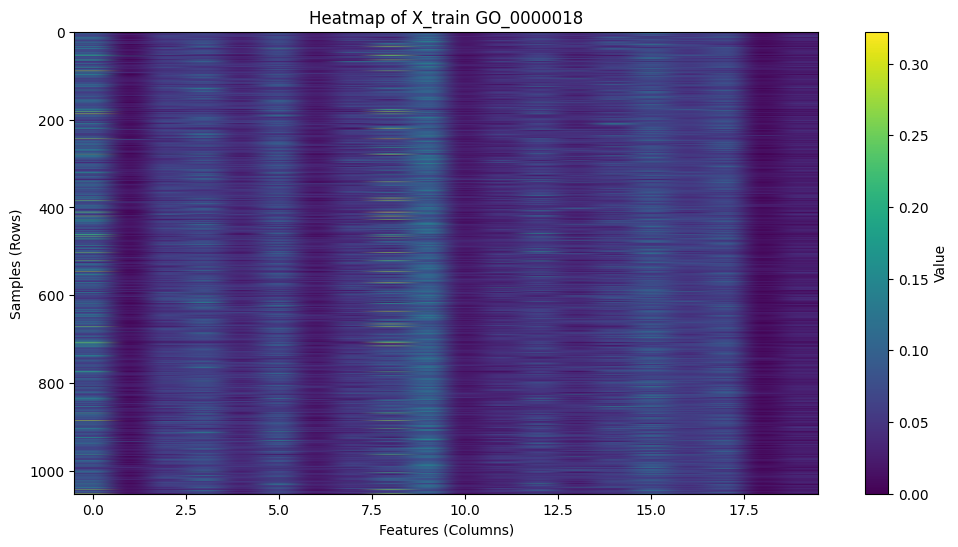

In [48]:
display(pd.DataFrame(X_train).head())
display(pd.DataFrame(X_train).describe())
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Plotting the heatmap
plt.figure(figsize=(12, 6))
plt.imshow(pd.DataFrame(X_train), aspect='auto', cmap='viridis')
plt.colorbar(label='Value')
plt.title(f"Heatmap of X_train {data_name}")
plt.xlabel("Features (Columns)")
plt.ylabel("Samples (Rows)")
plt.show()

In [49]:
#@title Applying the data scaling

data_scale_type = 'normalizer'# @param ['normalizer','standard','max_abs','min_max','robust']

X_scaled_train, scaler = scale_methods(X_train, scale_type=data_scale_type)
X_scaled_test = scaler.transform(X_test)
X_scaled_validation = scaler.transform(X_validation)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.293947,0.045612,0.162178,0.162178,0.096293,0.253403,0.106429,0.162178,0.136837,0.344628,0.086157,0.136837,0.369968,0.192586,0.146974,0.516941,0.233130,0.197654,0.040544,0.162178
1,0.323748,0.067761,0.225871,0.331277,0.075290,0.203284,0.067761,0.158109,0.180696,0.421625,0.097877,0.188225,0.165638,0.240929,0.255987,0.240929,0.255987,0.323748,0.075290,0.112935
2,0.305785,0.066116,0.210744,0.260331,0.169421,0.231405,0.074380,0.231405,0.314050,0.363636,0.123967,0.219008,0.198347,0.206612,0.227273,0.309917,0.206612,0.264463,0.037190,0.103306
3,0.377398,0.005170,0.134416,0.242982,0.036189,0.242982,0.108567,0.124076,0.180944,0.263662,0.041359,0.118906,0.248152,0.144756,0.299851,0.548003,0.289511,0.118906,0.015510,0.062038
4,0.282497,0.060535,0.322854,0.201784,0.242140,0.363210,0.100892,0.221962,0.262319,0.343032,0.020178,0.161427,0.221962,0.100892,0.141249,0.221962,0.201784,0.343032,0.040357,0.141249


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000
mean,0.313796,0.063761,0.209565,0.260136,0.147258,0.255807,0.096710,0.187164,0.260209,0.360609,0.087113,0.151984,0.207316,0.152985,0.207183,0.280971,0.207139,0.255812,0.045563,0.104439
std,0.110843,0.048709,0.066882,0.088497,0.060950,0.089336,0.046459,0.078040,0.129727,0.097309,0.037427,0.068588,0.077251,0.068305,0.079677,0.092364,0.050649,0.075536,0.032593,0.048033
min,0.047351,0.000000,0.000000,0.020802,0.009455,0.023427,0.000000,0.000000,0.000000,0.056266,0.008165,0.000000,0.034773,0.000000,0.010428,0.032292,0.024175,0.064583,0.000000,0.000000
25%,0.233385,0.031359,0.174796,0.210430,0.109742,0.192282,0.069061,0.133261,0.184910,0.301586,0.063863,0.103792,0.155626,0.107565,0.154785,0.214867,0.175596,0.203958,0.022807,0.072587
50%,0.300362,0.056786,0.213532,0.256220,0.148485,0.254575,0.091296,0.192414,0.253224,0.368820,0.085468,0.150732,0.199856,0.147914,0.203961,0.272559,0.207670,0.256268,0.040558,0.101573
75%,0.380000,0.084772,0.250785,0.308373,0.182951,0.315539,0.122492,0.238342,0.312097,0.423810,0.108898,0.196543,0.248552,0.194242,0.254624,0.337794,0.238071,0.302716,0.063098,0.138590
max,0.698432,0.497419,0.452037,0.568138,0.387759,0.652187,0.273975,0.516667,0.783815,0.651836,0.238663,0.499979,0.621483,0.538639,0.560112,0.643235,0.409616,0.535028,0.250706,0.303607


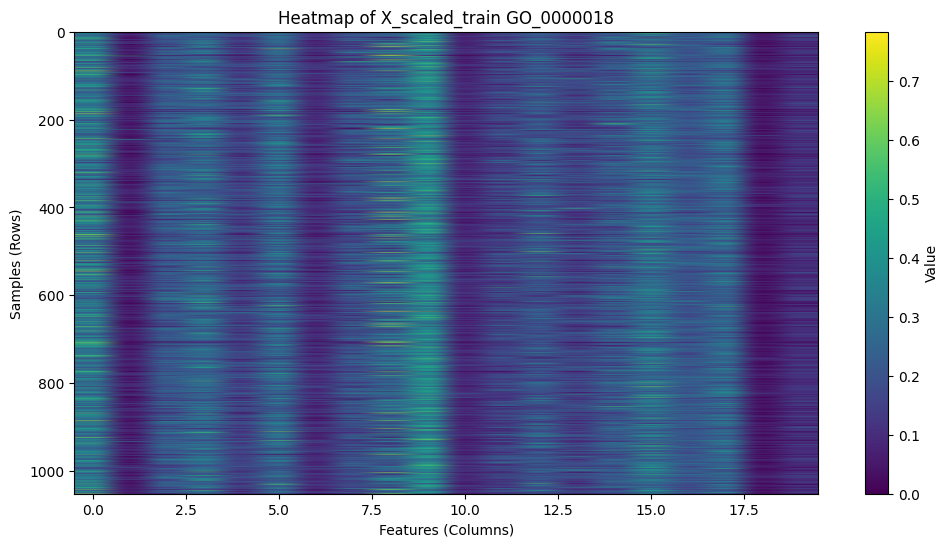

In [50]:
display(pd.DataFrame(X_scaled_train).head())
display(pd.DataFrame(X_scaled_train).describe())
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Plotting the heatmap
plt.figure(figsize=(12, 6))
plt.imshow(pd.DataFrame(X_scaled_train), aspect='auto', cmap='viridis')
plt.colorbar(label='Value')
plt.title(f"Heatmap of X_scaled_train {data_name}")
plt.xlabel("Features (Columns)")
plt.ylabel("Samples (Rows)")
plt.show()

### **Model Building and Training**

We will be using the `ProFAB` package to build the model. The `ProFAB` package provides a function called `classification_methods()` to build the model. The `classification_methods()` function has the following parameters:
- `X_train`: The training data.
- `y_train`: The target data.
- `ml_type`: {`logistic_regression`, `ridge_classifier`, `KNN`, `SVM`, `random_forest`, `DNN`, `naive_bayes`, `decision_tree`, `gradient_boosting`, `xgboost`, `lightgbm`, `cnn`, `rnn`}, ndicates the type of machine learning model to be used.

In [51]:
%%capture

ml_model_type = 'logistic_reg' # @param ['logistic_reg','ridge_class','KNN','SVM','random_forest','MLP','naive_bayes', 'decision_tree', 'gradient_boosting']

model = classification_methods(ml_type = ml_model_type, X_train = X_scaled_train, y_train = y_train)

### **Model Evaluation**

After building the model, we need to evaluate the model to see how well it performs. Use `evaluate_score()` function from the `ProFAB` package to evaluate the model. The `evaluate_score()` function has the following parameters:

- `model`: The model to be evaluated.
- `X_test`: The testing data.
- `y_test`: The target data.

In [52]:
score = evaluate_score(model, X_scaled_test, y_test)
table = ptable(score.keys())
table.add_row([round(v,2) for v in score.values()])
print(table)

+-----------+--------+----------+-----------+----------+------+------+-------+----+----+----+----+
| Precision | Recall | F1-Score | F05-Score | Accuracy | MCC  | AUC  | AUPRC | TP | FP | TN | FN |
+-----------+--------+----------+-----------+----------+------+------+-------+----+----+----+----+
|    0.44   |  0.26  |   0.33   |    0.39   |   0.7    | 0.16 | 0.57 |  0.45 | 11 | 14 | 95 | 31 |
+-----------+--------+----------+-----------+----------+------+------+-------+----+----+----+----+


### **Plot the Confusion Matrix**

Use sns.heatmap() to plot the confusion matrix. The confusion matrix is a table that is often used to describe the performance of a classification model on a set of data for which the true values are known.

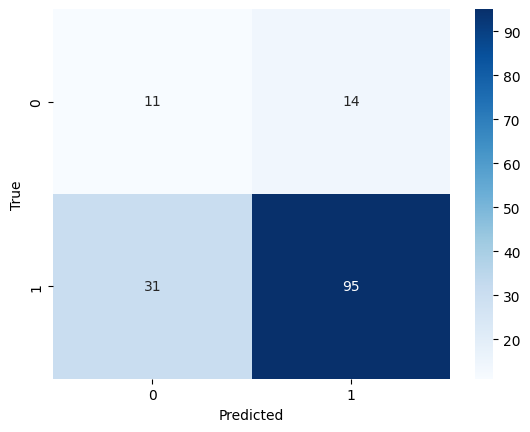

In [53]:
confusion_matrix = [[score['TP'], score['FP']], [score['FN'], score['TN']]]
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()